## Build a model to find the iris flower type based on Petal length, pettal width, sepal length, sepal width

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dataset = pd.read_csv('C:/Users/ADMIN/Desktop/FBS/Data Analysis/data set/iris.csv')

In [4]:
dataset

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [5]:
dataset['Species'].value_counts()

Species
Setosa        50
Versicolor    50
Virginica     50
Name: count, dtype: int64

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal_Length  150 non-null    float64
 1   Sepal_Width   150 non-null    float64
 2   Petal_Length  150 non-null    float64
 3   Petal_Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
dataset.isna().sum()

Sepal_Length    0
Sepal_Width     0
Petal_Length    0
Petal_Width     0
Species         0
dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x21681ae2ea0>,
 'caps': [<matplotlib.lines.Line2D at 0x21681ae3350>,
 'boxes': [<matplotlib.lines.Line2D at 0x21681ae2bd0>],
 'medians': [<matplotlib.lines.Line2D at 0x21681ae39b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x21681ae3ce0>],
 'means': []}

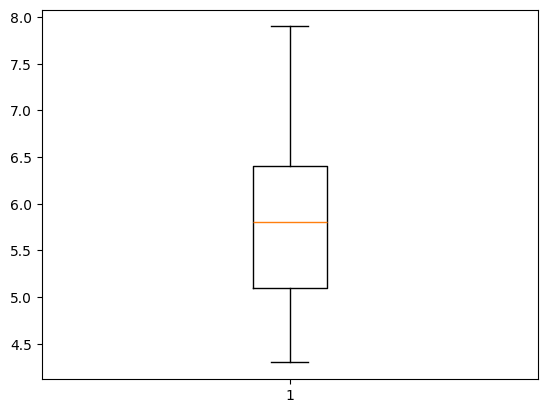

In [8]:
plt.boxplot(dataset['Sepal_Length'])

{'whiskers': [<matplotlib.lines.Line2D at 0x21681bb4530>,
 'caps': [<matplotlib.lines.Line2D at 0x21681bb4b00>,
 'boxes': [<matplotlib.lines.Line2D at 0x21681bb4290>],
 'medians': [<matplotlib.lines.Line2D at 0x21681bb4f80>],
 'fliers': [<matplotlib.lines.Line2D at 0x21681bb52b0>],
 'means': []}

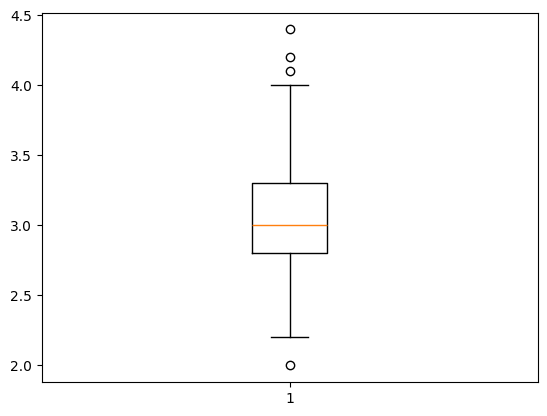

In [9]:
plt.boxplot(dataset['Sepal_Width'])

<Axes: xlabel='Petal_Length', ylabel='Count'>

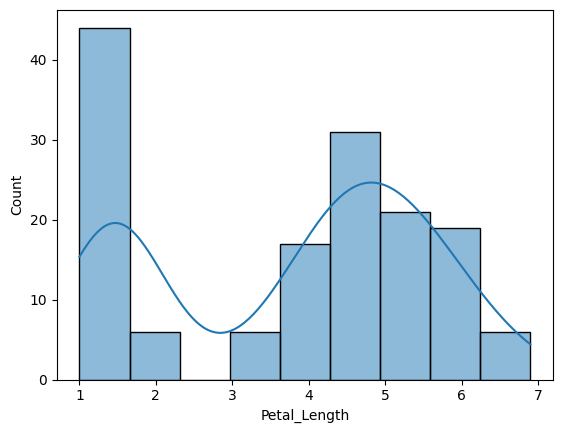

In [10]:
sns.histplot(dataset,x="Petal_Length",kde = True)

<Axes: >

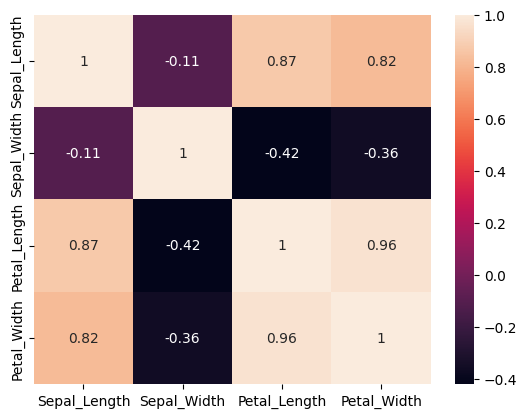

In [11]:
dataset1 = dataset.drop("Species", axis=True)
sns.heatmap(dataset1.corr(),annot=True)

In [12]:
dataset.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


### Split X & Y

In [13]:
x = dataset.iloc[:,:-1]
y = dataset["Species"]

In [14]:
x

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=20)

In [16]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

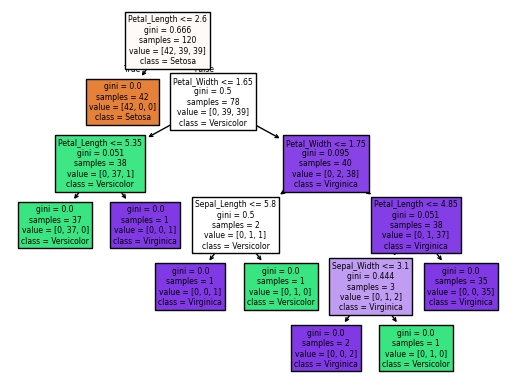

In [17]:
plot_tree(dt,feature_names=x.columns,class_names=y.unique(),filled=True)
plt.show()

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)


DecisionTreeClassifier()

In [19]:
train_pred = dt_model.predict(X_train)
train_accuracy = accuracy_score(y_train, train_pred)
print("Training Accuracy:", train_accuracy)

Training Accuracy: 1.0


In [20]:
test_pred = dt_model.predict(X_test)
test_accuracy = accuracy_score(y_test, test_pred)
print("Testing Accuracy:", test_accuracy)

Testing Accuracy: 0.9333333333333333
